In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Daten einlesen
df_ergebnis1 = pd.read_csv('Datasets/ergebnisse_-0.csv', sep=',')
df_ergebnis2 = pd.read_csv('Datasets/ergebnisse_-6.csv', sep=',')
df_ergebnis3 = pd.read_csv('Datasets/ergebnisse_-10.csv', sep=',')

# Sicherstellen, dass alle DataFrames dieselbe Struktur haben
# (könnte hilfreich sein, falls sie Unterschiede in den Spalten haben)
df_ergebnis1 = df_ergebnis1[['Modell', 'MAPE', 'MAD']]
df_ergebnis2 = df_ergebnis2[['Modell', 'MAPE', 'MAD']]
df_ergebnis3 = df_ergebnis3[['Modell', 'MAPE', 'MAD']]

# Die drei DataFrames zusammenführen (auf Basis der 'Modell'-Spalte)
df_combined = pd.merge(df_ergebnis1, df_ergebnis2, on='Modell', suffixes=('_1', '_2'))
df_combined = pd.merge(df_combined, df_ergebnis3, on='Modell')

# Berechnung der Mittelwerte für MAPE und MAD
df_combined['MAPE_mean'] = df_combined[['MAPE_1', 'MAPE_2', 'MAPE']].mean(axis=1)
df_combined['MAD_mean'] = df_combined[['MAD_1', 'MAD_2', 'MAD']].mean(axis=1)

# Auswahl der relevanten Spalten (Modell, MAPE_mean, MAD_mean)
df_results_mean = df_combined[['Modell', 'MAPE_mean', 'MAD_mean']]

# Ausgabe der Mittelwerte
print(df_results_mean)

                                               Modell  MAPE_mean      MAD_mean
0                                  Lineare Regression   5.676667  2.355958e+06
1               Lineare Regression mit Saisoneffekten   4.033333  1.628195e+06
2   Lineare Regression mit Saisoneffekten & Kausal...   3.460000  1.393592e+06
3                  Simple Exponential Smoothing (SES)   6.310000  2.592125e+06
4                 Double Exponential Smoothing (Holt)   7.810000  3.147887e+06
5   Triple Exponential Smoothing - Additiv (Holt-W...   2.090000  8.319406e+05
6   Triple Exponential Smoothing - Multiplikativ (...   1.746667  6.975996e+05
7                                        ARIMA(1,1,0)   7.190000  2.888580e+06
8                                        ARIMA(1,1,1)   7.170000  2.877799e+06
9                                        ARIMA(2,1,0)   7.003333  2.807727e+06
10                            SARIMA(1,1,1)(1,1,1)[6]   2.903333  1.155131e+06
11                            SARIMA(1,1,0)(1,1,1)[6

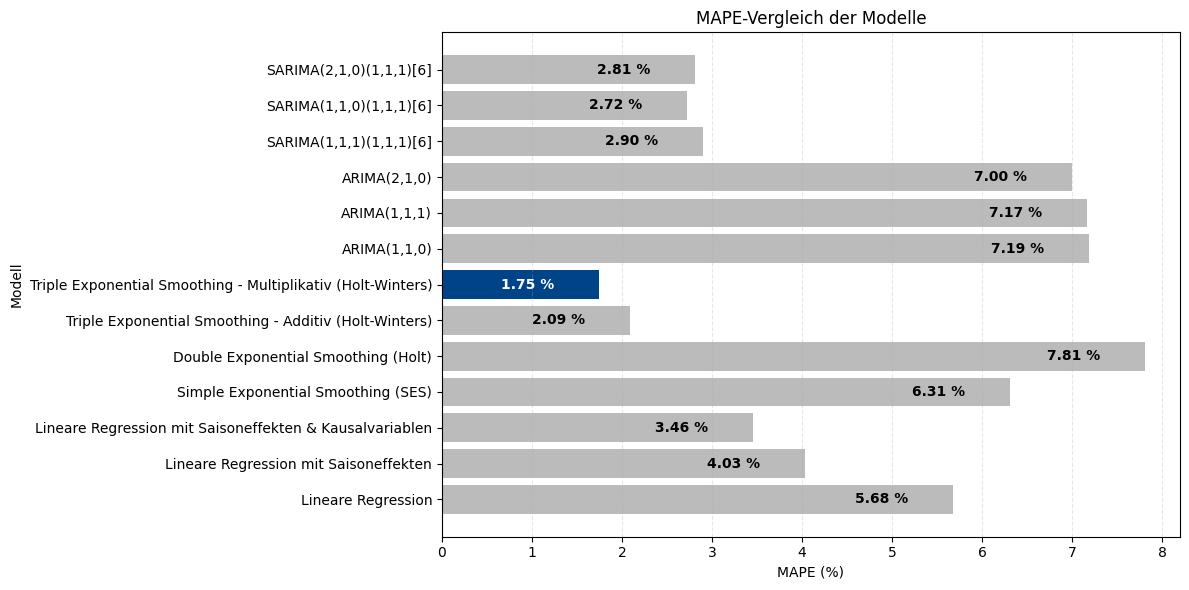

In [7]:
# Ergebnis-DataFrame mit den Mittelwerten erstellen (Angenommen, df_results_mean enthält den Mittelwert)
# Beispiel: df_results_mean enthält die Spalten 'Modell', 'MAPE_mean' und 'MAD_mean'
df_results = df_results_mean  # Verwende hier den neuen DataFrame mit den Mittelwerten

# Bestes Modell finden (kleinster MAPE-Wert)
best_index = df_results['MAPE_mean'].idxmin()

# Einheitlicher Stil für MAPE-Vergleich
plt.figure(figsize=(12, 6))

# Farben definieren: bester Balken hervorgehoben
base_color = '#BBBBBB'
highlight_color = '#004488'
colors = [highlight_color if i == best_index else base_color for i in range(len(df_results))]

# Balken zeichnen
bars = plt.barh(df_results['Modell'], df_results['MAPE_mean'], color=colors)

# Prozentwerte innerhalb der Balken platzieren
for i, bar in enumerate(bars):
    width = bar.get_width()
    text_color = 'white' if i == best_index else 'black'
    plt.text(width - 0.5, bar.get_y() + bar.get_height() / 2,
             f"{width:.2f} %",
             va='center', ha='right', fontsize=10, color=text_color, fontweight='bold')

# Achsenbeschriftungen & Stil
plt.xlabel('MAPE (%)')
plt.ylabel('Modell')
plt.title('MAPE-Vergleich der Modelle')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



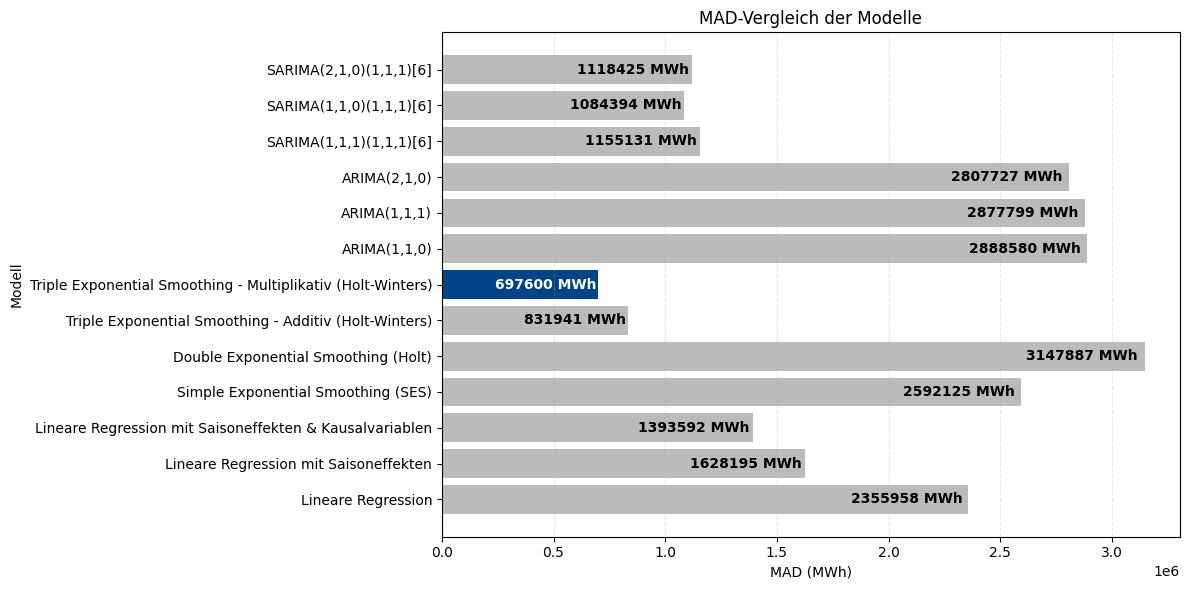

In [8]:
# Bestes Modell finden (kleinster MAD-Wert)
best_index = df_results['MAD_mean'].idxmin()

# Einheitlicher Stil für MAD-Vergleich
plt.figure(figsize=(12, 6))

# Farben definieren: bester Balken hervorgehoben
base_color = '#BBBBBB'
highlight_color = '#004488'
colors = [highlight_color if i == best_index else base_color for i in range(len(df_results))]

# Balken zeichnen
bars = plt.barh(df_results['Modell'], df_results['MAD_mean'], color=colors)

# Werte innerhalb der Balken platzieren
for i, bar in enumerate(bars):
    width = bar.get_width()
    text_color = 'white' if i == best_index else 'black'
    plt.text(width - (width * 0.01), bar.get_y() + bar.get_height() / 2,
             f"{width:.0f} MWh",
             va='center', ha='right', fontsize=10, color=text_color, fontweight='bold')

# Achsenbeschriftungen & Stil
plt.xlabel('MAD (MWh)')
plt.ylabel('Modell')
plt.title('MAD-Vergleich der Modelle')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()
